In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import pickle

In [4]:
#Reading the dataset
data_df = pd.read_csv("Churn_Modelling.csv")

In [5]:
data_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Information about the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#checking nulls
data_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#checking value cou ts for object columns
data_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
data_df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
#describing numerical columns
data_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


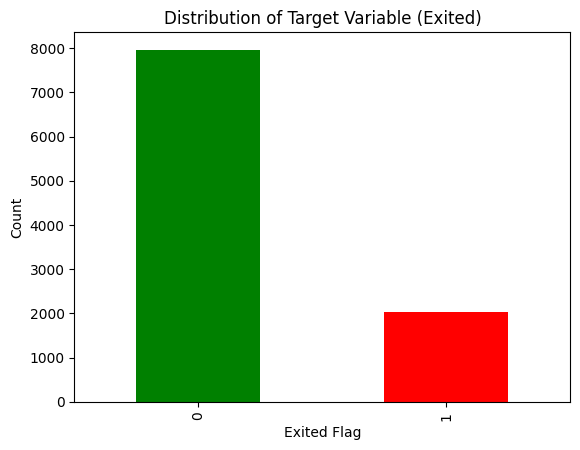

In [13]:
##Looking at teh distribution of the target variable
data_df['Exited'].value_counts().plot(kind='bar', title='Distribution of Target Variable (Exited)', color=['green', 'red'])
plt.xlabel('Exited Flag')
plt.ylabel('Count')
plt.show()

From the bar chart above, it is evident that the dataset is imbalanced

In [14]:
###dropping unnecessary columns
data_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [15]:
#Converting gender to numerical values using label encoding
le_gender = LabelEncoder()
data_df['Gender'] = le_gender.fit_transform(data_df['Gender'])
data_df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
le_gender.classes_

array(['Female', 'Male'], dtype=object)

Female -> 0
Male->1


In [19]:
#converting geography to numerical values using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe_geo= OneHotEncoder()
geo_encoded = ohe_geo.fit_transform(data_df[['Geography']])

In [ ]:
#integrating the one-hot encoded columns back into the dataframe
geo_encoded_df = pd.DataFrame(geo_encoded.toarray(), columns=ohe_geo.get_feature_names_out(['Geography']))
data_df = pd.concat([data_df, geo_encoded_df], axis=1)
data_df.drop(['Geography'], axis=1, inplace=True)

In [23]:
data_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [24]:
#saving the label encoder and one-hot encoder for future use

#saving the label encoder for gender
with open ('label_encoder_gender.pkl','wb') as file:
    pickle.dump(le_gender, file)

#saving the one-hot encoder for geography
with open ('one_hot_encoder_geo.pkl','wb') as file:
    pickle.dump(ohe_geo, file)

In [25]:
#Dividing the dataset into features and target variable

X= data_df.drop(['Exited'], axis=1)
y= data_df['Exited']

##Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Saving the scaler for future use
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## Implementation of ANN

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [29]:
import datetime

In [30]:
##building the ANN

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],))) #Hidden Layer 1 connected to input layer
model.add(Dropout(0.1))  #Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  #Hidden Layer 2
model.add(Dropout(0.1))  #Dropout layer to prevent overfitting
model.add(Dense(1, activation='sigmoid')) #Output Layer



In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#optimizer
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [33]:
#compiling the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
#set up the tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [35]:
##setting up early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [38]:
#Train the model
history  = model.fit(X_train_scaled, y_train, 
                     epochs = 100,
                     batch_size =32,
                     validation_split = 0.2,
                     callbacks=[tensorflow_callback, early_stopping_callback],
                     verbose =1
                     )

Epoch 1/100
200/200 [==============================] - 1s 1ms/step - loss: 0.6897 - accuracy: 0.5436 - val_loss: 0.5727 - val_accuracy: 0.7819
Epoch 2/100
200/200 [==============================] - 0s 741us/step - loss: 0.5368 - accuracy: 0.7848 - val_loss: 0.4926 - val_accuracy: 0.7994
Epoch 3/100
200/200 [==============================] - 0s 799us/step - loss: 0.4892 - accuracy: 0.7937 - val_loss: 0.4626 - val_accuracy: 0.8006
Epoch 4/100
200/200 [==============================] - 0s 765us/step - loss: 0.4711 - accuracy: 0.7969 - val_loss: 0.4465 - val_accuracy: 0.8069
Epoch 5/100
200/200 [==============================] - 0s 798us/step - loss: 0.4559 - accuracy: 0.8006 - val_loss: 0.4357 - val_accuracy: 0.8119
Epoch 6/100
200/200 [==============================] - 0s 700us/step - loss: 0.4490 - accuracy: 0.8048 - val_loss: 0.4277 - val_accuracy: 0.8194
Epoch 7/100
200/200 [==============================] - 0s 701us/step - loss: 0.4424 - accuracy: 0.8067 - val_loss: 0.4217 - val_accu

In [2]:
#load tensorboard extension
%reload_ext tensorboard

#start tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 8710), started 0:00:08 ago. (Use '!kill 8710' to kill it.)

In [ ]:
#launch tensorboard in a new tab
#model evaluation
